## Exploratory Data Analysis

#### Dataset 1: Crimes

The United States crimes dataset from kaggle contained 4 csv files, each containing information about crimes for cities. They csv files are separated by population ranges.

* 'crime_40 _60.csv': dataset for population ranging from 40,000 to 60,000.

* 'crime_60 _100.csv': dataset for population ranging from 60,000 to 100,000.

* 'crime_100 _250.csv': dataset for population ranging from 100,000 to 250,000.

* 'crime_250 _plus.csv': dataset for population greater than 250,000.

We're interested in all the cities available in the dataset so we will combine the csvs into one dataframe.

First, inspecting each csv as a dataframe separately, checking columns and values.

In [1]:
import pandas as pd

In [2]:

pd.read_csv('crime/crime_250_plus.csv').head()

,states,cities,population,total_crime,murder,rape,robbery,agrv_assault,tot_violent_crime,burglary,larceny,vehicle_theft,tot_prop_crim,arson
0,Alabama,Mobile3,"248,431",6217.02,20.13,58.16,177.11,485.85,740.25,"1,216.84","3,730.21",506.78,"5,453.83",22.94
1,Alaska,Anchorage,"296,188",6640.04,9.12,132.01,262.67,799.49,"1,203.29",748.17,"3,619.66","1,047.98","5,415.82",20.93
2,Arizona,Chandler,"249,355",2589.08,2.01,52.13,56.95,148.38,259.47,314.41,"1,866.01",149.18,"2,329.61",NaN
3,Arizona,Gilbert,"242,090",1483.75,2.07,16.11,21.07,46.26,85.51,192.49,"1,137.59",55.76,"1,385.85",12.39
4,Arizona,Glendale,"249,273",5037.85,4.81,38.91,192.96,251.53,488.22,637.45,"3,426.36",466.56,"4,530.37",19.26


In [3]:
pd.read_csv('crime/crime_100_250.csv').head()


,states,cities,population,violent_crime,murder,rape,robbery,agrv_assault,prop_crime,burglary,larceny,vehicle_theft
0,Texas,Abilene,"119,886",393.7,2.5,31.7,105.9,253.6,"3,664.3",865,"2,656.7",142.6
1,Ohio,Akron,"198,390",886.6,12.1,84.2,290.8,499.5,"5,057.7","1,728.4","2,965.9",363.4
2,Virginia,Alexandria,"145,892",166.6,-,6.2,94.6,65.8,"2,049.5",192.6,"1,633.4",223.5
3,Pennsylvania,Allentown,"119,334",547.2,12.6,45.3,313.4,176,"3,857.2","1,045.8","2,503.1",308.4
4,Texas,Amarillo,"196,576",650.1,5.1,56.0,141.4,447.7,"4,527.5","1,061.7","3,145.9",320


In [4]:
pd.read_csv('crime/crime_40_60.csv').head()

,states,cities,population,violent_crime,murder,rape,robbery,agrv_assault,prop_crime,burglary,larceny,vehicle_theft
0,Pennsylvania,"Abington Township, Montgomery County","55,731",197.4,1.8,14.4,70.0,111.2,1979.1,296.1,1650.8,32.3
1,Oregon,Albany,"51,084",86.1,0.0,19.6,45.0,21.5,3092.9,438.5,2470.4,184.0
2,Louisiana,Alexandria,"48,449",1682.2,18.6,28.9,293.1,1341.6,7492.4,2010.4,5102.3,379.8
3,California,Aliso Viejo,"48,999",87.8,0.0,0.0,12.2,75.5,847.0,208.2,612.3,26.5
4,Florida,Altamonte Springs,"42,296",335.7,2.4,21.3,82.8,229.3,3057.0,427.9,2463.6,165.5


In [5]:
pd.read_csv('crime/crime_60_100.csv').head()

,states,cities,population,violent_crime,murder,rape,robbery,agrv_assault,prop_crime,burglary,larceny,vehicle_theft
0,California,Alameda,"75,467",212.0,1.3,11.91,106.0,92.8,"2,507.1",392.2,"1,723.9",390.9
1,Georgia,Albany,"78,512","1,035.5",5.1,34.4,285.3,710.7,"6,369.7","1,793.4","4,291.1",285.3
2,New York,Albany,"98,187",816.8,4.1,43.8,253.6,515.3,"4,420.1",903.4,"3,359.9",156.8
3,California,Alhambra,"84,469",176.4,-,2.4,78.1,95.9,"2,271.8",384.8,"1,585.2",301.9
4,Texas,Allen,"88,783",61.9,-,12.4,14.6,34.9,"1,612.9",242.2,"1,321.2",49.6


After inspecting the csvs, combine all of them into a dataframe called crime.

In [6]:
import pandas as pd
import os

directories = ['crime', 'income']

dfs = []
filenames = os.listdir('crime')
filenames = [f for f in filenames if os.path.isfile(os.path.join('crime', f))]

for filename in filenames:
    df = pd.read_csv(f'crime/{filename}')
    dfs.append(df)
    
crime = pd.concat(dfs, ignore_index=True)
    

In [7]:
# checking the number of rows and columns
crime.shape

(975, 16)

Other EDA tasks such as inspecting individual columns and why there are duplicate values. There are multiple cities with the same name but from different states which is why there's duplicates in cities.

In [8]:
crime['cities'].nunique()

889

In [9]:
crime['cities'].value_counts() 

cities
Springfield        5
Lakewood           4
Albany             3
Columbus           3
Newark             3
                  ..
Davis              1
Daytona Beach      1
Dearborn           1
Deerfield Beach    1
Yucaipa            1
Name: count, Length: 889, dtype: int64

clean up cities column by remvoving uneccesary characters and values from the city name

In [10]:
crime['cities'] = crime['cities'].str.replace(r'\d+', '', regex=True)

In [11]:
crime['violent_crime'] = crime['violent_crime'].fillna(crime['tot_violent_crime'])
crime['prop_crime'] = crime['prop_crime'].fillna(crime['tot_prop_crim'])

Dropping columns because they're not present across all datasets. The crimes csv file for cities with population of 250,000+ contained 4 extra columns that are not in the other 3 datasets so there's no information on these columns for cities under 250,000 population and they appear as null values in the dataframe, so we can drop those columns.

In [12]:
crime.drop(columns = ['total_crime','arson', 'tot_prop_crim', 'tot_violent_crime'], inplace = True)

In [13]:
crime.dtypes

states            object
cities            object
population        object
murder            object
rape              object
robbery          float64
agrv_assault      object
burglary          object
larceny           object
vehicle_theft     object
violent_crime     object
prop_crime        object
dtype: object

In [14]:
crime.replace('-', '0', inplace=True)

In [15]:

    
crime['population'] = crime['population'].str.replace(',', '').astype(int)
crime['murder'] = crime['murder'].astype(float)
crime['rape'] = crime['rape'].astype(float)
#crime['agrv_assault'] = crime['agrv_assault'].astype(float)
#crime['burglary'] = crime['burglary'].astype(float)
#crime['larceny'] = crime['larceny'].str.replace(',', '').astype(float)
#crime['vehicle_theft'] = crime['vehicle_theft'].str.replace(',', '').astype(float)
#crime['violent_crime'] = crime['violent_crime'].str.replace(',', '').astype(float)
#crime['prop_crime'] = crime['prop_crime'].str.replace(',', '').astype(float)


In [16]:
crime.head()

,states,cities,population,murder,rape,robbery,agrv_assault,burglary,larceny,vehicle_theft,violent_crime,prop_crime
0,Alabama,Mobile,248431,20.13,58.16,177.11,485.85,"1,216.84","3,730.21",506.78,740.25,"5,453.83"
1,Alaska,Anchorage,296188,9.12,132.01,262.67,799.49,748.17,"3,619.66","1,047.98","1,203.29","5,415.82"
2,Arizona,Chandler,249355,2.01,52.13,56.95,148.38,314.41,"1,866.01",149.18,259.47,"2,329.61"
3,Arizona,Gilbert,242090,2.07,16.11,21.07,46.26,192.49,"1,137.59",55.76,85.51,"1,385.85"
4,Arizona,Glendale,249273,4.81,38.91,192.96,251.53,637.45,"3,426.36",466.56,488.22,"4,530.37"


In [17]:
crime.to_csv('cleaned_crime.csv', index=False)

#### Dataset 2: Median Income

In [18]:
median_income = pd.read_csv('med_income_23/ACSST1Y2023.S1902-Data.csv')

In [19]:
median_income = median_income[['NAME','S1902_C01_001E']]
median_income.drop(index=0, inplace = True)
median_income.rename(columns={'NAME': 'City', 'S1902_C01_001E': 'Median Income'}, inplace=True)

In [20]:
# Keeping data only for cities in the United States
us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 
    'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 
    'West Virginia', 'Wisconsin', 'Wyoming'
]

# Filter the DataFrame to keep only U.S. cities

median_income['City'] = median_income['City'].str.replace(r'\s*(city|town|CDP|municipality)\s*', '', regex=True).str.strip()


#df.drop(columns=['Location'], inplace=True)

median_income['State'] = median_income['City'].str.split(', ').str[1]  # Extract the state
median_income['City'] = median_income['City'].apply(lambda x: x.split(',')[0].strip())
df_us = median_income[median_income['State'].isin(us_states)]  # Keep only rows where the state is in the list

#df_us.drop(columns=['State'], inplace=True)

df_us

,City,Median Income,State
1,Auburn,32859,Alabama
2,Birmingham,91740,Alabama
3,Dothan,30920,Alabama
4,Hoover,38178,Alabama
5,Huntsville,99557,Alabama
...,...,...,...
639,Milwaukee,227173,Wisconsin
640,Oshkosh,28147,Wisconsin
641,Racine,31700,Wisconsin
642,Waukesha,30668,Wisconsin


In [21]:
df_us.to_csv('cleaned_income.csv', index=False)

#### Merging the Two Datasets

Now that the data is cleaned, we can merge it together so it can be more convenient for statistical analysis.

In [22]:
merged_data = pd.merge(df_us, crime, left_on=['City', 'State'], right_on=['cities','states'], how='inner')

In [23]:
merged_data.head()

,City,Median Income,State,states,cities,population,murder,rape,robbery,agrv_assault,burglary,larceny,vehicle_theft,violent_crime,prop_crime
0,Auburn,32859,Alabama,Alabama,Auburn,54785,5.5,23.7,45.6,166.1,763.0,2646.7,93.1,240.9,3502.8
1,Birmingham,91740,Alabama,Alabama,Birmingham,213266,31.4,71.3,460.9,954.2,"2,205.7","4,239.8",488.6,"1,517.8","6,934.1"
2,Dothan,30920,Alabama,Alabama,Dothan,66275,7.5,45.3,150.9,277.6,"1,336.9","2,894.0",196.2,481.3,"4,427.0"
3,Hoover,38178,Alabama,Alabama,Hoover,82332,2.4,15.8,55.9,30.4,477.3,"2,067.2",103.2,104.5,"2,647.8"
4,Huntsville,99557,Alabama,Alabama,Huntsville,183691,7.6,39.2,248.2,628.2,"1,178.6","3,476.5",386.5,923.3,"5,041.6"


In [24]:
# Drop redundant columns
merged_data = merged_data.drop(['states', 'cities'], axis = 1)

In [25]:
merged_data.isnull().sum()

City              0
Median Income     0
State             0
population        0
murder            0
rape             10
robbery           0
agrv_assault      0
burglary          1
larceny           0
vehicle_theft     0
violent_crime    10
prop_crime        1
dtype: int64

In [26]:
merged_data.fillna(0, inplace=True)

In [27]:
merged_data.isnull().sum()

City             0
Median Income    0
State            0
population       0
murder           0
rape             0
robbery          0
agrv_assault     0
burglary         0
larceny          0
vehicle_theft    0
violent_crime    0
prop_crime       0
dtype: int64

In [62]:
merged_data.head()

,City,Median Income,State,population,murder,rape,robbery,agrv_assault,burglary,larceny,vehicle_theft,violent_crime,prop_crime,High Crime
0,Auburn,32859.0,Alabama,54785,5.5,23.7,45.6,166.1,763.0,2646.7,93.1,240.9,3502.8,0
1,Birmingham,91740.0,Alabama,213266,31.4,71.3,460.9,954.2,2205.7,4239.8,488.6,1517.8,6934.1,1
2,Dothan,30920.0,Alabama,66275,7.5,45.3,150.9,277.6,1336.9,2894.0,196.2,481.3,4427.0,1
3,Hoover,38178.0,Alabama,82332,2.4,15.8,55.9,30.4,477.3,2067.2,103.2,104.5,2647.8,0
4,Huntsville,99557.0,Alabama,183691,7.6,39.2,248.2,628.2,1178.6,3476.5,386.5,923.3,5041.6,1


In [29]:
merged_data.to_csv('income_and_crimes.csv', index=False)

## Further Analysis- Mulitple Linear Regression, Logistic Regression, K-Means


In [41]:
def check_non_numeric(df, columns):
    for col in columns:
        non_numeric_values = df[col].apply(lambda x: not isinstance(x, (int, float)))
        if non_numeric_values.sum() > 0:
            print(f"Column '{col}' has {non_numeric_values.sum()} non-numeric values.")

numeric_cols = ["Median Income", "population", "murder", "rape", "robbery", "agrv_assault",
                "burglary", "larceny", "vehicle_theft", "violent_crime", "prop_crime"]

check_non_numeric(merged_data, numeric_cols)

Column 'Median Income' has 483 non-numeric values.
Column 'agrv_assault' has 445 non-numeric values.
Column 'burglary' has 444 non-numeric values.
Column 'larceny' has 445 non-numeric values.
Column 'vehicle_theft' has 445 non-numeric values.
Column 'violent_crime' has 437 non-numeric values.
Column 'prop_crime' has 444 non-numeric values.


In [43]:
# Select only numeric columns before applying median
numeric_cols = ["Median Income", "agrv_assault", "burglary", "larceny",
                "vehicle_theft", "violent_crime", "prop_crime"]

# Remove commas and convert columns to numeric
for col in numeric_cols:
    merged_data[col] = merged_data[col].replace({",": ""}, regex=True)  # Remove commas
    merged_data[col] = pd.to_numeric(merged_data[col], errors="coerce")  # Convert to numeric

# Handle missing values only for numeric columns
merged_data[numeric_cols] = merged_data[numeric_cols].fillna(merged_data[numeric_cols].median())

# Verify if all columns are now numeric
print(merged_data.dtypes)


City              object
Median Income    float64
State             object
population         int64
murder           float64
rape             float64
robbery          float64
agrv_assault     float64
burglary         float64
larceny          float64
vehicle_theft    float64
violent_crime    float64
prop_crime       float64
dtype: object


### Multiple Linear Regression

In [49]:
numeric_cols = ["Median Income", "agrv_assault", "burglary", "larceny",
                "vehicle_theft", "violent_crime", "prop_crime"]

# Remove commas and convert columns to numeric
for col in numeric_cols:
    merged_data[col] = merged_data[col].replace({",": ""}, regex=True)  # Remove commas
    merged_data[col] = pd.to_numeric(merged_data[col], errors="coerce")  # Convert to numeric

# Handle missing values by replacing with the median (only for numeric columns)
merged_data[numeric_cols] = merged_data[numeric_cols].fillna(merged_data[numeric_cols].median())

# Now running Multiple Linear Regression on violent crime
X = merged_data[["Median Income", "population"]]
y = merged_data["violent_crime"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test set
y_pred = lin_reg.predict(X_test)

# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

mse

61346.71800271717

In [51]:
import statsmodels.api as sm

# Add a constant for the intercept
X_with_const = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X_with_const).fit()

# Get the full regression summary
ols_summary = ols_model.summary()

# Display the summary
ols_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          violent_crime   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     8.637
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           0.000207
Time:                        11:53:24   Log-Likelihood:                -3494.7
No. Observations:                 483   AIC:                             6995.
Df Residuals:                     480   BIC:                             7008.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           288.9631     37.801      7.644      0.000     214.687     363.239
Median Income    -0.0010      0.002     -0.563      0.573      -0.005       0.003
population        0.0017      0.001      2.188      0.029       0.000       0.003
==============================================================================
Omnibus:                      242.261   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1719.192
Skew:                           2.077   Prob(JB):                         0.00
Kurtosis:                      11.257   Cond. No.                     3.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Logistic Regression 

In [61]:
median_crime = merged_data["violent_crime"].median()
merged_data["High Crime"] = (merged_data["violent_crime"] > median_crime).astype(int)

# Define features and target for logistic regression
X_log = merged_data[["Median Income", "population"]]
y_log = merged_data["High Crime"]

# Split data into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_log, y_train_log)

# Predict on test set
y_pred_log = log_reg.predict(X_test_log)
accuracy = accuracy_score(y_test_log, y_pred_log)

# OLS-style summary for Logistic Regression using statsmodels
X_log_const = sm.add_constant(X_log)  # Add intercept
logit_model = sm.Logit(y_log, X_log_const).fit()
logistic_summary = logit_model.summary()

# Return Logistic Regression results
{"Logistic Regression Accuracy": accuracy}
logistic_summary

Optimization terminated successfully.
         Current function value: 0.672477
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             High Crime   No. Observations:                  483
Model:                          Logit   Df Residuals:                      480
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Mar 2025   Pseudo R-squ.:                 0.02982
Time:                        12:10:09   Log-Likelihood:                -324.81
converged:                       True   LL-Null:                       -334.79
Covariance Type:            nonrobust   LLR p-value:                 4.619e-05
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9438      0.236     -3.995      0.000      -1.407      -0.481
Median Income  -1.32e-06   1.12e-05     -0.118      0.906   -2.32e-05    2.06e-05
population     9.439e-06   4.97e-06      1.899      0.058   -3.02e-07    1.92e-05
=================================================================================
"""

### K-Means

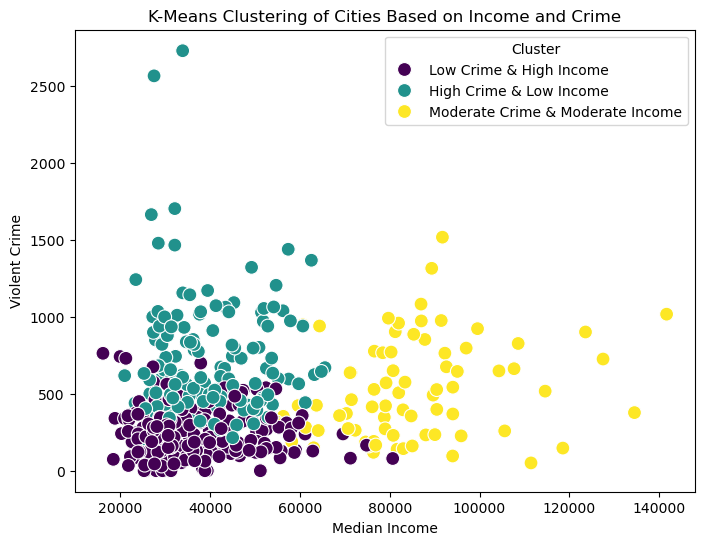

{'Low Crime & High Income': 257,
 'Moderate Crime & Moderate Income': 150,
 'High Crime & Low Income': 76}

In [72]:
cluster_labels = {
    0: "Low Crime & High Income",
    1: "Moderate Crime & Moderate Income",
    2: "High Crime & Low Income"
}

df_cleaned["Cluster Label"] = df_cleaned["Cluster"].map(cluster_labels)

plt.figure(figsize=(8,6))
scatter = sns.scatterplot(x=df_cleaned["Median Income"], y=df_cleaned["violent_crime"], hue=df_cleaned["Cluster"], palette="viridis", s=100)

handles, _ = scatter.get_legend_handles_labels()
plt.legend(handles, [cluster_labels[int(label)] for label in df_cleaned["Cluster"].unique()], title="Cluster")
plt.title("K-Means Clustering of Cities Based on Income and Crime")
plt.xlabel("Median Income")
plt.ylabel("Violent Crime")
plt.show()


df_cleaned["Cluster Label"].value_counts().to_dict()

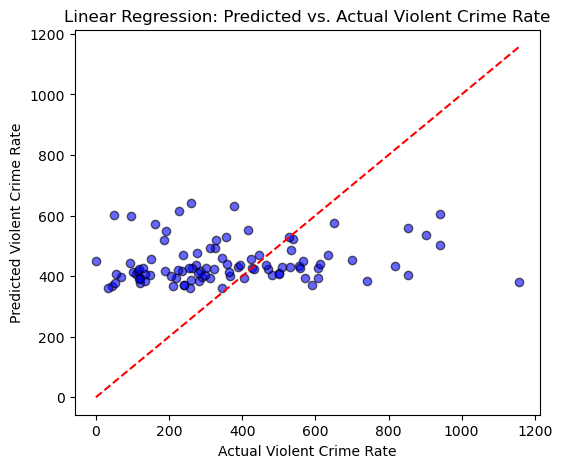

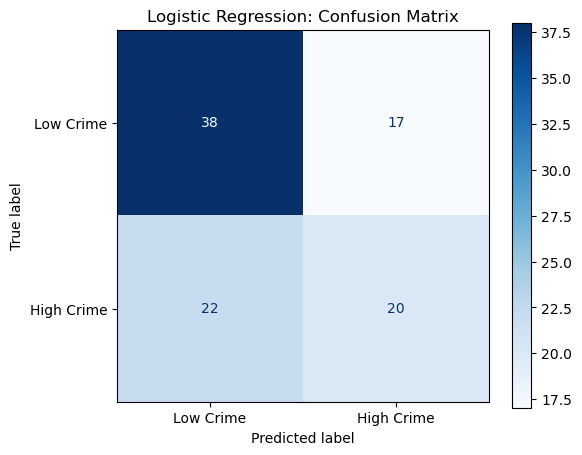

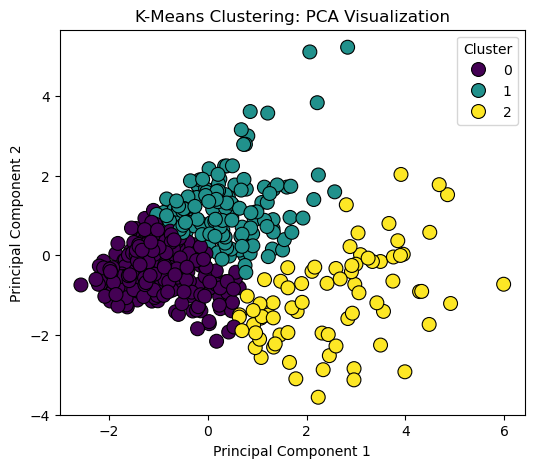

In [77]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- 1. Scatter Plot: Predicted vs. Actual for Multiple Linear Regression --- #
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")  # Perfect fit line
plt.xlabel("Actual Violent Crime Rate")
plt.ylabel("Predicted Violent Crime Rate")
plt.title("Linear Regression: Predicted vs. Actual Violent Crime Rate")
plt.show()

# --- 2. Confusion Matrix for Logistic Regression --- #
conf_matrix = confusion_matrix(y_test_log, y_pred_log)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Low Crime", "High Crime"])
fig, ax = plt.subplots(figsize=(6,5))
disp.plot(ax=ax, cmap="Blues")
plt.title("Logistic Regression: Confusion Matrix")
plt.show()

# --- 3. PCA Visualization of K-Means Clusters --- #
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_fixed)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_cleaned["Cluster"], palette="viridis", s=100, edgecolor="k")
plt.title("K-Means Clustering: PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()
